# ECON 5314
# Penalized Linear Regression

**Ali Haidari**  

**alih**

**3/13/2023**

--- --- ---

In [1]:
#reading in given training and test set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train_url = "https://raw.githubusercontent.com/nimamox/bigdata-nb-files/master/data/HW_train.csv"
test_url = "https://raw.githubusercontent.com/nimamox/bigdata-nb-files/master/data/HW_test.csv"

data_train = pd.read_csv(train_url).drop('Unnamed: 0', axis=1)
data_test = pd.read_csv(test_url).drop('Unnamed: 0', axis=1)
data_train.columns = 'x'+data_train.columns
data_train.rename(columns={'x40':'y'}, inplace=True)
data_test.columns = 'x'+data_test.columns
data_test.rename(columns={'x40':'y'}, inplace=True)

### A)
--- --- ---

In [2]:
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score 

#isolate the predictors in training set
x_train = data_train.loc[:, data_train.columns != "y"]
#isolate the actual response in training set
y_train = data_train.loc[:, data_train.columns == "y"]
#isolate the predictors in test set
x_test = data_test.loc[:, data_test.columns != "y"]
#isolate the actual response in test set
y_test = data_test.loc[:, data_test.columns == "y"]
#temp list for list comprehension concatenation
temp = []
#collect all regressors
[temp.append("x" + str(i)) for i in range(0, 40)]
#join and add plus
concat = "+".join(temp)
#finalize the formula with intercept omission
reg_formula = "y ~ " + concat + "-1"
#fit the model based off of the formula
lm = smf.ols(formula = reg_formula, data = data_train).fit()
y_hat_t = lm.predict(x_train)
#report r2 for findings in training set fit
print("the r2 score of OLS regression on training set : " + str(r2_score(y_train, y_hat_t)))
#predict y hat values from regressors in test set
y_hat = lm.predict(x_test)
#report r2 for findings in test set fit
print("the r2 score of OLS regression on test set : " + str(r2_score(y_hat, y_test)))

the r2 score of OLS regression on training set : 1.0
the r2 score of OLS regression on test set : 0.35458804029022106


### B)
--- --- ---

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#static lambda values
lambda_ridge = 3000
lambda_lasso = 30
#create ridge model object with create lambda
ridge_reg = Ridge(alpha = lambda_ridge)
lasso_reg = Lasso(alpha = lambda_lasso)
#fit the ridge regression model using training data
ridge_reg.fit(x_train, y_train)
lasso_reg.fit(x_train, y_train)
#predict the y hat ridge and lasso values from test set
ridge_y_hat = ridge_reg.predict(x_test)
lasso_y_hat = lasso_reg.predict(x_test)
#predict the y hat ridge and lasso values from train set
ridge_y_hat_t = ridge_reg.predict(x_train)
lasso_y_hat_t = lasso_reg.predict(x_train)
#report r2 score findings for both training and test set
print("the r2 score of Ridge regression on train set : " + str(r2_score(ridge_y_hat_t, y_train)))
r2_ridge = r2_score(ridge_y_hat, y_test)
print("the r2 score of Ridge regression on test set : " + str(r2_ridge))
print("the r2 score of Lasso regression on train set : " + str(r2_score(lasso_y_hat_t, y_train)))
r2_lasso = r2_score(lasso_y_hat, y_test)
print("the r2 score of Lasso regression on test set : " + str(r2_lasso))

the r2 score of Ridge regression on train set : 0.9078758454209519
the r2 score of Ridge regression on test set : 0.636865535912595
the r2 score of Lasso regression on train set : 0.8447251732496744
the r2 score of Lasso regression on test set : 0.6569555699833336


### C)
--- --- ---

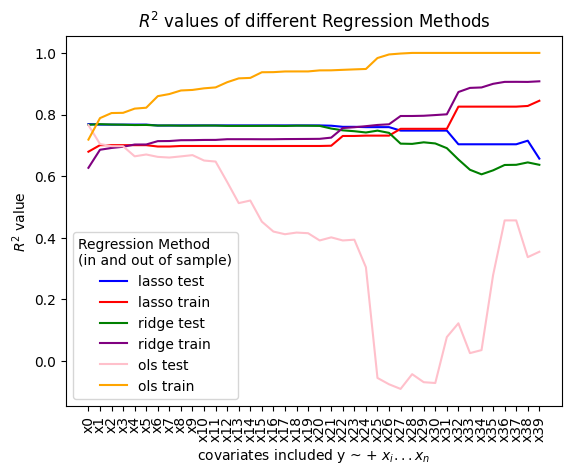

In [112]:
#r2_reg_df = pd.Dataframe()
temp = "y ~ "

index_list = []
r2_ols_train = []
r2_ridge_train = []
r2_lasso_train = []
r2_ols_test = []
r2_ridge_test = []
r2_lasso_test = []

iter_ridge = Ridge(alpha=lambda_ridge)
iter_lasso = Lasso(alpha=lambda_lasso)

for i in range(0, len(x_train.columns)):

    index_list.append(x_train.columns[i])
    temp += "x"+str(i) + "+"
    formula = temp[:-1]

    ols_lm = smf.ols(formula = formula, data = data_train).fit()
    ridge_lm = iter_ridge.fit(x_train[index_list], y_train)
    lasso_lm = iter_lasso.fit(x_train[index_list], y_train)

    ols_train_pred = ols_lm.predict(x_train)
    ridge_train_pred = ridge_lm.predict(x_train[index_list])
    lasso_train_pred = lasso_lm.predict(x_train[index_list])

    ols_test_pred = ols_lm.predict(x_test)
    ridge_test_pred = ridge_lm.predict(x_test[index_list])
    lasso_test_pred = lasso_lm.predict(x_test[index_list])

    r2_ols_train.append(r2_score(ols_train_pred, y_train))
    r2_ridge_train.append(r2_score(ridge_train_pred, y_train))
    r2_lasso_train.append(r2_score(lasso_train_pred, y_train))

    r2_ols_test.append(r2_score(ols_test_pred, y_test))
    r2_ridge_test.append(r2_score(ridge_test_pred, y_test))
    r2_lasso_test.append(r2_score(lasso_test_pred, y_test))


plt.plot(x_train.columns, r2_lasso_test, color = "blue", label = "lasso test")
plt.plot(x_train.columns, r2_lasso_train, color = "red", label = "lasso train")
plt.plot(x_train.columns, r2_ridge_test, color = "green", label = "ridge test")
plt.plot(x_train.columns, r2_ridge_train, color = "purple", label = "ridge train")
plt.plot(x_train.columns, r2_ols_test, color = "pink", label = "ols test")
plt.plot(x_train.columns, r2_ols_train, color = "orange", label = "ols train")
plt.xticks(rotation = 90)
plt.xlabel("covariates included" + r" y ~ + $x_i ... x_n$")
plt.ylabel(r"$R^2$ value")
plt.title(r"$R^2$ values of different Regression Methods")
plt.legend(loc = "best", title = "Regression Method \n(in and out of sample)")